# 04. Pytorch Custom Datasets Theory

## Implement Adam Optimization Alogrithm from Scratch

In [ ]:
# objective function
def objective():
  return x**2.0 + y**2.0



## Theory

In [ ]:
# custom dataset = collection of data relating to problem u r working on
import torch
from torch import nn
torch.__version__

'2.5.1+cu124'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [ ]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [ ]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/sushi/200025.jpg
Image class: sushi
Image height: 512
Image width: 382


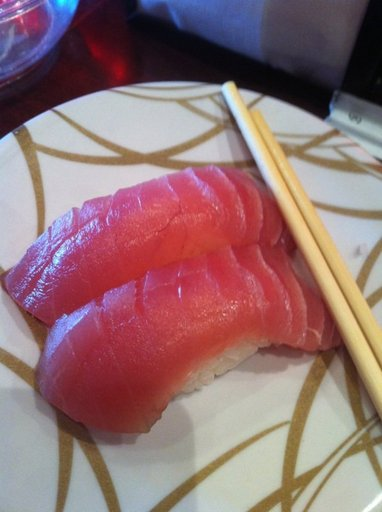

In [ ]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

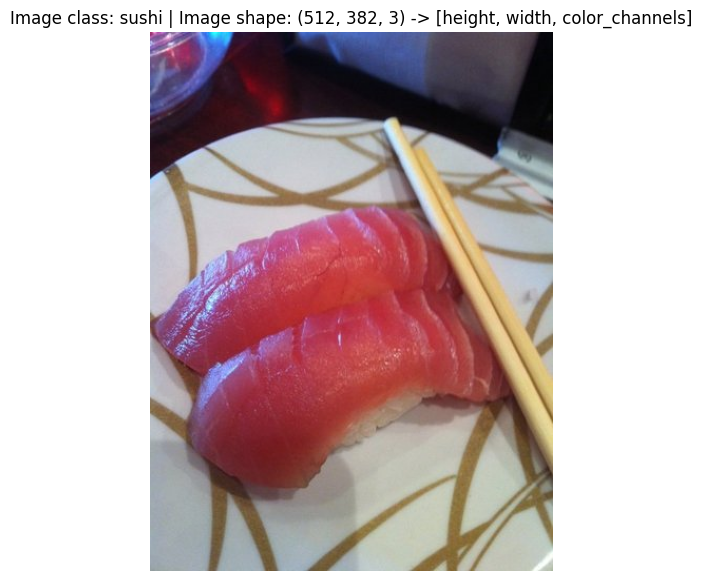

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

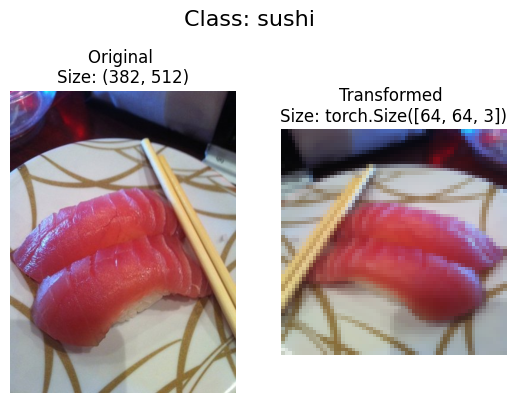

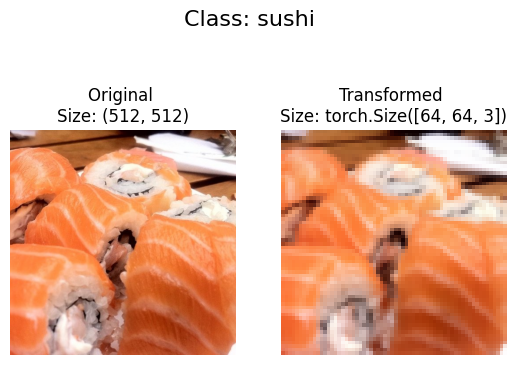

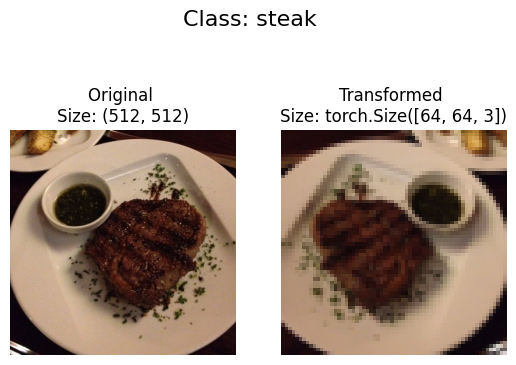

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Check the lengths
len(train_data), len(test_data)

(225, 75)

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


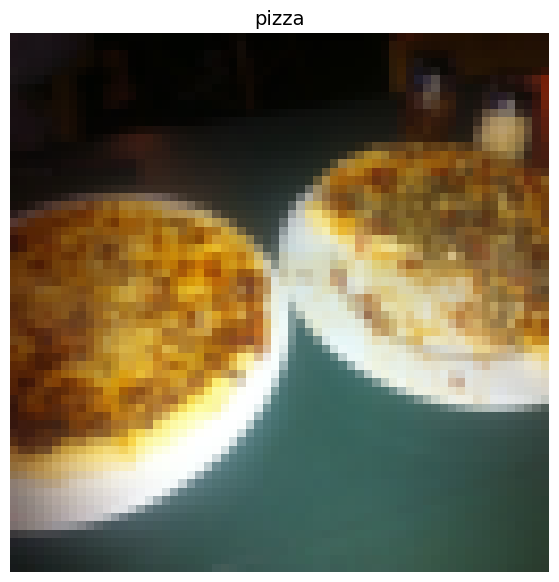

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [ ]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bfba24fe310>,
 <torch.utils.data.dataloader.DataLoader at 0x7bfb9a246cd0>)

In [ ]:
im, label = next(iter(train_dataloader))
im.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [ ]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## Option 2: Loading image data with a custom dataset

In [ ]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

target_dir = train_dir
print(f"Target dir: {target_dir}")

class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class name found: {class_names_found}")

Target dir: data/pizza_steak_sushi/train
Class name found: ['pizza', 'steak', 'sushi']


In [ ]:
def find_classes(image_path: str)->Tuple[List[str], Dict[str, int]]:
  classes = sorted(entry.name for entry in os.scandir(image_path) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f"Couldn't fint any classes in {image_path}")

  class_idxs = {name: i for i, name in enumerate(classes)}
  return classes, class_idxs

In [ ]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
class CustomDataset(Dataset):
  def __init__(self, tar_dir: str, transform=None):
    self.paths = list(pathlib.Path(tar_dir).glob("*/*.jpg"))

    self.transform = transform
    self.classes, self.class_dict = find_classes(tar_dir)

  def load_image(self, index: int) -> Image.Image:
    image_path=self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self, index:int) -> Tuple[torch.Tensor, int]:
    img=self.load_image(index)
    class_name=self.paths[index].parent.name
    class_idx=self.class_dict[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
train_custom = CustomDataset(tar_dir=train_dir, transform=train_transform)
test_custom = CustomDataset(tar_dir=test_dir, transform=test_transform)

train_custom, test_custom

(<__main__.CustomDataset at 0x7bfb9a087650>,
 <__main__.CustomDataset at 0x7bfb9a315c50>)

In [ ]:
len(train_custom), len(test_custom)

(225, 75)

In [ ]:
train_custom.classes, train_custom.class_dict

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
def display_random(dataset: Dataset, classes: List[str]=None, n:int=10, display_shape: bool=True, seed: int=None):
  if n >= 10:
    n=10
    display_shape = False
  if seed:
    random.seed(seed)

  random_samples=random.sample(range(len(dataset)), k=n)

  plt.figure(figsize=(16, 8))

  for i, tar_sample in enumerate(random_samples):
    tar_img, tar_label = dataset[tar_sample][0], dataset[tar_sample][1]

    tar_img_adjust = tar_img.permute(1, 2, 0)
    plt.subplot(1, n, i + 1)
    plt.imshow(tar_img_adjust)
    plt.axis(False)

    if classes:
      title = f"class: {classes[tar_label]}"
      if display_shape:
        title = title + f"\nshape{tar_img_adjust.shape}"

    plt.title(title)

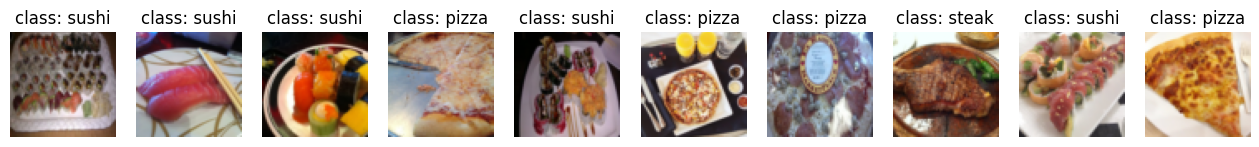

In [ ]:
display_random(train_custom, classes=class_names)

In [ ]:
train_loader_custom = DataLoader(train_custom, batch_size=1, num_workers=0, shuffle=True)
test_loader_custom = DataLoader(test_custom, batch_size=1, num_workers=0, shuffle=False)

In [ ]:
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

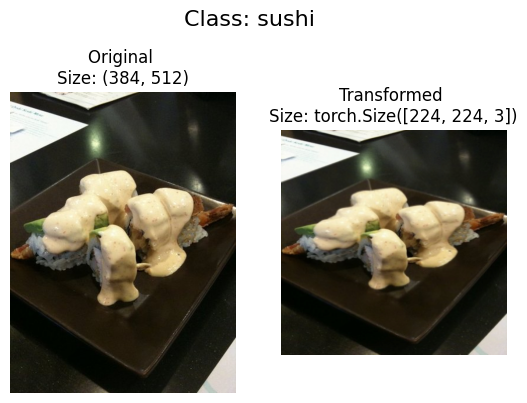

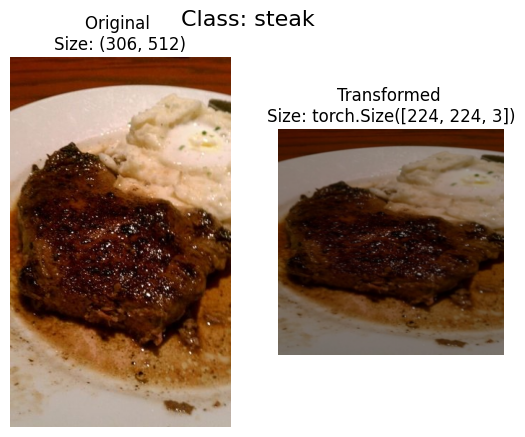

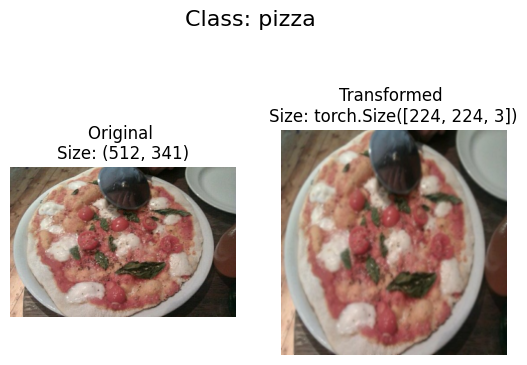

In [ ]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

In [ ]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [ ]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7bfb99e4e1d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7bfb99d75290>)

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape:int, hidden_unit: int, output_shape:int)->None:
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(hidden_unit, hidden_unit, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_unit, hidden_unit, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_unit*16*16, out_features=output_shape)
    )

  def forward(self, x:torch.Tensor):
    x=self.conv_block_1(x)
    x=self.conv_block_2(x)
    x=self.classifier(x)
    return x

torch.manual_seed(42)
model_0=TinyVGG(input_shape=3, hidden_unit=10, output_shape=len(train_data.classes)).to(device)

In [ ]:
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0578, 0.0634, 0.0351]])

Output prediction probabilities:
tensor([[0.3352, 0.3371, 0.3277]])

Output prediction label:
tensor([1])

Actual label:
2


In [ ]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [ ]:
def train_step(model: nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer):
  model.train()

  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred_class=torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  train_acc = train_acc/len(dataloader)
  train_loss = train_loss/len(dataloader)

  return train_loss, train_acc

In [ ]:
def test_step(model: nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: nn.Module):
  model.eval()

  test_acc, test_loss = 0.0, 0.0
  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      loss = loss_fn(y_pred, y)
      test_loss += loss.item()

      labels = y_pred.argmax(dim=1)
      test_acc += (y_pred == y).sum().item()/len(labels)

  test_acc = test_acc / len(dataloader)
  test_loss = test_loss / len(dataloader)
  return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

def train(model: nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: nn.Module=nn.CrossEntropyLoss(),
          epochs: int=5):
  results={"train_loss":[],
           "train_acc":[],
           "test_loss":[],
           "test_acc":[],}

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer)
    test_loss, test_acc = test_step(model, test_dataloader, loss_fn)

    print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
    results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
    results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
    results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
    results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

  return results

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

result_0 = train(model_0, train_dataloader, test_dataloader, optimizer, loss_fn, NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time - start_time}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1100 | train_acc: 0.2844 | test_loss: 1.0995 | test_acc: 0.0000
Epoch: 2 | train_loss: 1.0990 | train_acc: 0.3067 | test_loss: 1.1006 | test_acc: 0.0000
Epoch: 3 | train_loss: 1.0983 | train_acc: 0.3600 | test_loss: 1.1004 | test_acc: 0.0000
Epoch: 4 | train_loss: 1.0987 | train_acc: 0.2800 | test_loss: 1.1006 | test_acc: 0.0000
Epoch: 5 | train_loss: 1.0968 | train_acc: 0.3467 | test_loss: 1.1020 | test_acc: 0.0000
Total training time: -14.28150500000001


In [ ]:
result_0.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss(results: Dict[str, List[float]]):
  loss = results['train_loss']
  test_loss = results['test_loss']

  acc = results['train_acc']
  test_acc = results['test_acc']

  plt.figure(figsize=(15, 7))
  epochs = range(len(results['train_loss']))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, acc, label='train_acc')
  plt.plot(epochs, test_acc, label='test_acc')
  plt.title('Acc')
  plt.xlabel('Epoch')
  plt.legend()

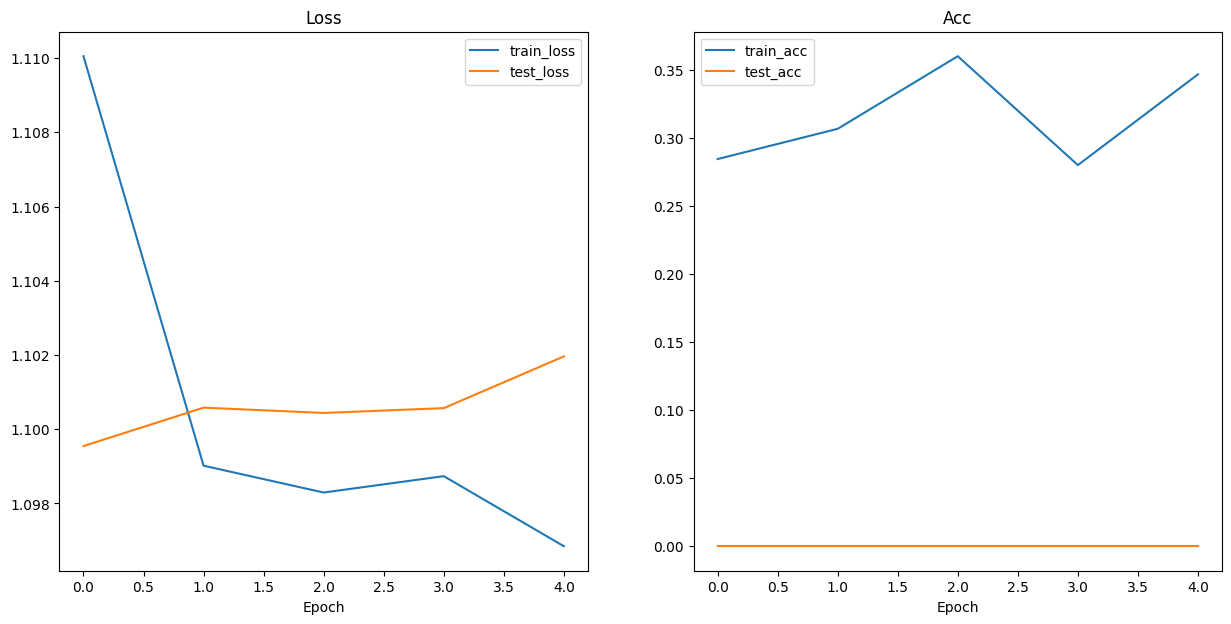

In [ ]:
plot_loss(result_0)

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.5.1+cu124


'cpu'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

- Train for longer. So far, we just only train models on 5 epochs, which is two short for model to learn data's feature
- Increase model's layer so that model may be smart enough to learn image's features
- Tweak for learning rate

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

data_path = Path("/data")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} exists")
else:
  print(f"Did not find {image_path} dir, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

  with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data ...")
    f.write(request.content)

    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
      print("unzipping")
      zip_ref.extractall(image_path)


train_dir = image_path / "train"
test_dir = image_path / "test"

Did not find /data/pizza_steak_sushi dir, creating one...
unzipping


In [4]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
# Setup train and testing paths


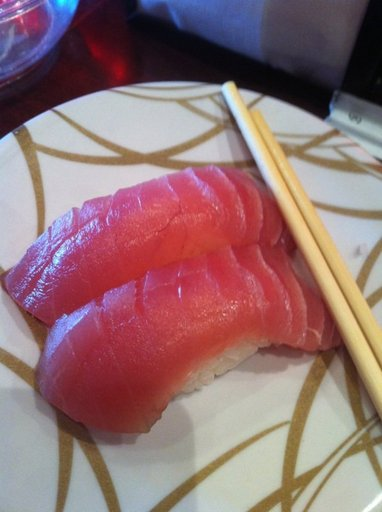

In [5]:
# Visualize an image
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

img

(-0.5, 381.5, 511.5, -0.5)

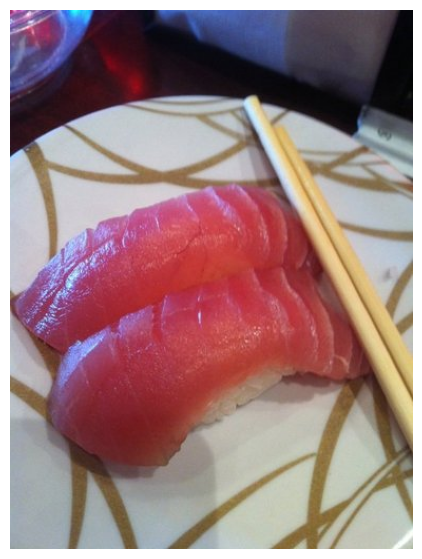

In [8]:
# Do the image visualization with matplotlib
img = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis(False)

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [10]:
# 3.1 Transforming data with torchvision.transforms
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


In [11]:
from torchvision import datasets
# Write transform for turning images into tensors
train_data = datasets.ImageFolder(train_dir, transform, None)
test_data = datasets.ImageFolder(test_dir, transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: /data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: /data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

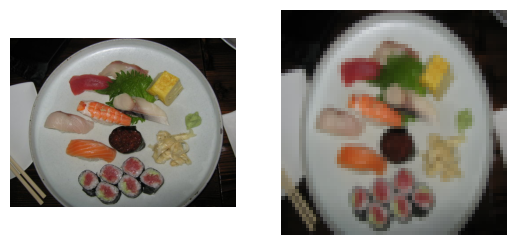

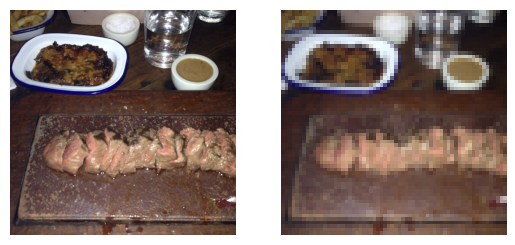

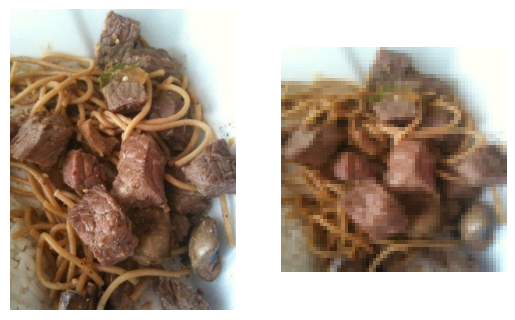

In [14]:
# Write a function to plot transformed images
def plot_transformed_images(image_ls, transform, n:int=3, seed=43):
  random.seed(seed)
  random_images = random.sample(image_ls, k=n)
  for image in random_images:
    with Image.open(image) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].axis(False)

      transformed = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed)
      ax[1].axis(False)

plot_transformed_images(image_path_list, transform)

### Load image data using `ImageFolder`

In [ ]:
# Use ImageFolder to create dataset(s)


In [15]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [17]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [19]:
# Turn train and test Datasets into DataLoaders
train_loader = DataLoader(train_data, batch_size = 1, num_workers=1, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 1, num_workers=1, shuffle=False)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x78f14c8bf4d0>,
 <torch.utils.data.dataloader.DataLoader at 0x78f03e4ed750>)

In [22]:
# How many batches of images are in our data loaders?
len(train_loader), len(test_loader)

(225, 75)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [31]:
class TinyVGG(nn.Module):
  def __init__(self, input, hidden, output):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(input, hidden, 3, 1, 1),
        nn.ReLU(),
        nn.Conv2d(hidden, hidden, 3, 1, 1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden, hidden, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden, hidden, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden * 16 * 16, output)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

In [32]:
torch.manual_seed(42)
model_0 = TinyVGG(3, 10, len(train_data.classes)).to(device)
model_0

TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [29]:
!pip install torchinfo

In [33]:
import torchinfo
from torchinfo import summary

summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## 4. Create training and testing functions for `model_0`.

In [48]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    pred_class = torch.argmax(y_pred, dim=1)
    train_acc += (y == pred_class).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss, train_acc

In [49]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(y_pred, y)
      test_loss += loss.item()
      # Calculate and accumulate accuracy
      pred_class = torch.argmax(y_pred, dim=1)
      test_acc += (pred_class == y).sum().item() / len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  test_acc = test_acc/len(dataloader)
  test_loss = test_loss/len(dataloader)

  return test_loss, test_acc

In [50]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [51]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

In [52]:
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_loader,
                        test_dataloader=test_loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=5)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1126 | train_acc: 0.3289 | test_loss: 1.1006 | test_acc: 0.2533
Epoch: 2 | train_loss: 1.1025 | train_acc: 0.3289 | test_loss: 1.1005 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0992 | train_acc: 0.3422 | test_loss: 1.1008 | test_acc: 0.3067
Epoch: 4 | train_loss: 1.0979 | train_acc: 0.3556 | test_loss: 1.0997 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.1068 | train_acc: 0.3511 | test_loss: 1.1000 | test_acc: 0.3333
Total training time: 24.023 seconds


In [53]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

In [54]:
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_loader,
                        test_dataloader=test_loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=20)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1018 | train_acc: 0.4178 | test_loss: 1.1063 | test_acc: 0.3600
Epoch: 2 | train_loss: 1.0416 | train_acc: 0.4133 | test_loss: 1.1833 | test_acc: 0.2800
Epoch: 3 | train_loss: 1.0112 | train_acc: 0.5067 | test_loss: 1.0796 | test_acc: 0.3467
Epoch: 4 | train_loss: 0.9415 | train_acc: 0.5422 | test_loss: 1.1285 | test_acc: 0.3600
Epoch: 5 | train_loss: 0.8662 | train_acc: 0.6222 | test_loss: 1.2250 | test_acc: 0.3333
Epoch: 6 | train_loss: 0.7339 | train_acc: 0.6889 | test_loss: 1.3082 | test_acc: 0.3733
Epoch: 7 | train_loss: 0.5453 | train_acc: 0.7911 | test_loss: 1.9318 | test_acc: 0.3333
Epoch: 8 | train_loss: 0.4418 | train_acc: 0.8089 | test_loss: 2.1976 | test_acc: 0.3467
Epoch: 9 | train_loss: 0.2849 | train_acc: 0.8844 | test_loss: 2.5096 | test_acc: 0.3600
Epoch: 10 | train_loss: 0.1754 | train_acc: 0.9289 | test_loss: 2.8497 | test_acc: 0.3600
Epoch: 11 | train_loss: 0.1149 | train_acc: 0.9556 | test_loss: 3.7922 | test_acc: 0.3200
Epoch: 12 | train_l

In [55]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)

In [56]:
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_loader,
                        test_dataloader=test_loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=50)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0490 | train_acc: 0.9822 | test_loss: 8.2870 | test_acc: 0.2800
Epoch: 2 | train_loss: 0.1305 | train_acc: 0.9822 | test_loss: 5.7451 | test_acc: 0.3600
Epoch: 3 | train_loss: 0.0081 | train_acc: 0.9956 | test_loss: 6.2182 | test_acc: 0.3333
Epoch: 4 | train_loss: 0.0119 | train_acc: 0.9911 | test_loss: 6.5804 | test_acc: 0.3467
Epoch: 5 | train_loss: 0.0011 | train_acc: 1.0000 | test_loss: 6.8625 | test_acc: 0.3600
Epoch: 6 | train_loss: 0.0003 | train_acc: 1.0000 | test_loss: 6.9341 | test_acc: 0.3467
Epoch: 7 | train_loss: 0.0002 | train_acc: 1.0000 | test_loss: 7.0365 | test_acc: 0.3467
Epoch: 8 | train_loss: 0.0002 | train_acc: 1.0000 | test_loss: 7.1073 | test_acc: 0.3467
Epoch: 9 | train_loss: 0.0002 | train_acc: 1.0000 | test_loss: 7.1820 | test_acc: 0.3333
Epoch: 10 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 7.2327 | test_acc: 0.3333
Epoch: 11 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 7.3096 | test_acc: 0.3200
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [57]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = TinyVGG(3, 20, len(train_data.classes)).to(device)

In [58]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.001)

In [59]:
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_1,
                        train_dataloader=train_loader,
                        test_dataloader=test_loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=20)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1041 | train_acc: 0.3378 | test_loss: 1.1001 | test_acc: 0.2533
Epoch: 2 | train_loss: 1.0990 | train_acc: 0.2889 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0990 | train_acc: 0.3200 | test_loss: 1.1009 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0988 | train_acc: 0.2978 | test_loss: 1.1008 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0987 | train_acc: 0.3467 | test_loss: 1.1013 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.1149 | train_acc: 0.3378 | test_loss: 1.1014 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0984 | train_acc: 0.3467 | test_loss: 1.1018 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.1023 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0981 | train_acc: 0.3467 | test_loss: 1.1030 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.1018 | train_acc: 0.3600 | test_loss: 1.1022 | test_acc: 0.3333
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [60]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [61]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.


Excellent, we now have double the training and testing images...

In [62]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [63]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets
train_data_simple = ImageFolder(train_data_20_percent_path, transform=simple_transform)
test_data_simple = ImageFolder(test_data_20_percent_path, transform=simple_transform)
# Create dataloaders
train_loader_simple = DataLoader(train_data_simple, 1, True)
test_loader_simple = DataLoader(test_data_simple, 1, False)

next(iter(train_loader_simple))

[tensor([[[[0.2235, 0.2353, 0.2392,  ..., 0.6431, 0.6745, 0.7020],
           [0.2196, 0.2314, 0.2314,  ..., 0.6196, 0.6549, 0.6863],
           [0.2118, 0.2235, 0.2157,  ..., 0.6235, 0.6784, 0.7098],
           ...,
           [0.1333, 0.1294, 0.1333,  ..., 0.5882, 0.6157, 0.6353],
           [0.1373, 0.1373, 0.1412,  ..., 0.6118, 0.6275, 0.6157],
           [0.1294, 0.1294, 0.1333,  ..., 0.6431, 0.6510, 0.6118]],
 
          [[0.2549, 0.2667, 0.2745,  ..., 0.4235, 0.4196, 0.4196],
           [0.2431, 0.2588, 0.2667,  ..., 0.4000, 0.4039, 0.4118],
           [0.2392, 0.2471, 0.2471,  ..., 0.3961, 0.4235, 0.4392],
           ...,
           [0.1255, 0.1216, 0.1333,  ..., 0.3176, 0.3412, 0.3451],
           [0.1255, 0.1294, 0.1373,  ..., 0.3373, 0.3529, 0.3373],
           [0.1294, 0.1294, 0.1373,  ..., 0.3647, 0.3608, 0.3373]],
 
          [[0.2980, 0.3098, 0.3059,  ..., 0.3176, 0.2941, 0.2784],
           [0.2745, 0.2863, 0.2902,  ..., 0.2784, 0.2588, 0.2549],
           [0.2627, 0.26

In [64]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [65]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_1_results = train(model=model_1,
                        train_dataloader=train_loader_simple,
                        test_dataloader=test_loader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=20)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9543 | train_acc: 0.5289 | test_loss: 0.9011 | test_acc: 0.6000
Epoch: 2 | train_loss: 0.9179 | train_acc: 0.5622 | test_loss: 0.9340 | test_acc: 0.5200
Epoch: 3 | train_loss: 0.8584 | train_acc: 0.6089 | test_loss: 0.8535 | test_acc: 0.6400
Epoch: 4 | train_loss: 0.8388 | train_acc: 0.5956 | test_loss: 0.9444 | test_acc: 0.5067
Epoch: 5 | train_loss: 0.7780 | train_acc: 0.6511 | test_loss: 0.9125 | test_acc: 0.5333
Epoch: 6 | train_loss: 0.7462 | train_acc: 0.6800 | test_loss: 0.8634 | test_acc: 0.5600
Epoch: 7 | train_loss: 0.6809 | train_acc: 0.7000 | test_loss: 0.8593 | test_acc: 0.6133
Epoch: 8 | train_loss: 0.6427 | train_acc: 0.7311 | test_loss: 0.8688 | test_acc: 0.5933
Epoch: 9 | train_loss: 0.5348 | train_acc: 0.7822 | test_loss: 1.0140 | test_acc: 0.5733
Epoch: 10 | train_loss: 0.4328 | train_acc: 0.8222 | test_loss: 1.1782 | test_acc: 0.5800
Epoch: 11 | train_loss: 0.3696 | train_acc: 0.8578 | test_loss: 1.2638 | test_acc: 0.5733
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

In [68]:
import torchvision
from typing import Tuple, Dict, List

In [69]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

In [72]:
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

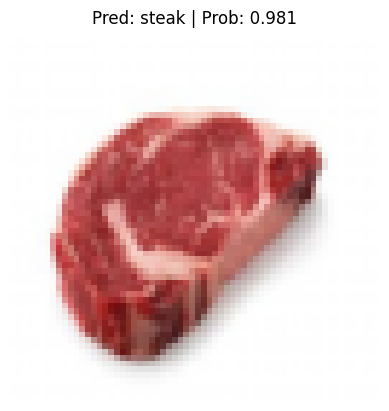

In [75]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path="/steak_test.jpg",
                    class_names=train_data.classes,
                    transform=custom_image_transform,
                    device=device)